# Titanic: Machine Learning from Disaster

In this activity, we'll analyze the Titanic dataset and build a predictive model to determine survival outcomes. We'll guide you through the process step by step using Google Colab.

For a comprehensive walkthrough of this activity with detailed explanations for each step, please refer to [this link](./titanic-l.ipynb).

## Overview

This is the legendary [Titanic ML competition](https://www.kaggle.com/competitions/titanic) – the best, first challenge for you to dive into ML competitions.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data Description

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Files

The data has been split into two groups:

    training set (train.csv)
    Real data (real.csv)



## Setup:

> Before we start, let's set up the environment in **colab**

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




## Load Data




Let's load the Titanic dataset into our Colab environment.

In [2]:

# URL of the train dataset
train_url = "https://github.com/ML-Course-2025/session3/raw/refs/heads/main/datasets/titanic/train.csv"

# Load train dataset
train_data = pd.read_csv(train_url)



In [3]:
# URL of the real dataset
real_data_url = "https://github.com/ML-Course-2025/session3/raw/refs/heads/main/datasets/titanic/real.csv"

# Load real dataset
real_data = pd.read_csv(real_data_url)

## Print numberr of passengers in train dataset

In [4]:
print('# of passengers in train dataset: ' + str(len(train_data)))

# of passengers in train dataset: 891


> Out of the total 1317 passengers, the count of 891 individuals represents about 67% of the entire passenger population. [Ref](https://titanicfacts.net/titanic-passengers/)

## Data Analysis


### Number of passengers Survived

<Axes: xlabel='Survived', ylabel='count'>

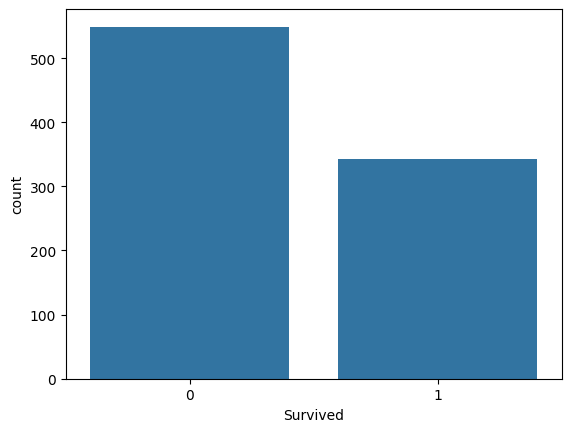

In [5]:
sns.countplot(x = 'Survived', data = train_data)

**Seaborn (imported as sns),** is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn is particularly useful for visualizing data from Pandas DataFrames and NumPy arrays.

The code `sns.countplot(x='Survived', data=train_data)` is using Seaborn to create a count plot based on the 'Survived' column from the DataFrame named 'train'.



### Number of passengers Survived based on Passenger Class






<Axes: xlabel='Survived', ylabel='count'>

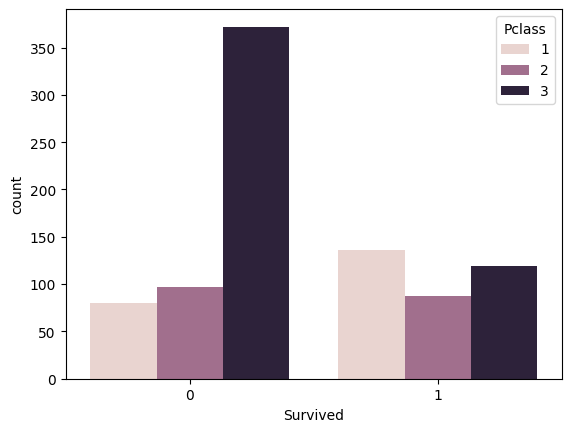

In [6]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)


The code `sns.countplot(x='Survived', hue='Pclass', data=train_data)` is using Seaborn to create a count plot based on the 'Survived' column from the DataFrame named 'train', with further differentiation based on the 'Pclass' column.


### Frequency of passengers group by Age





<Axes: ylabel='Frequency'>

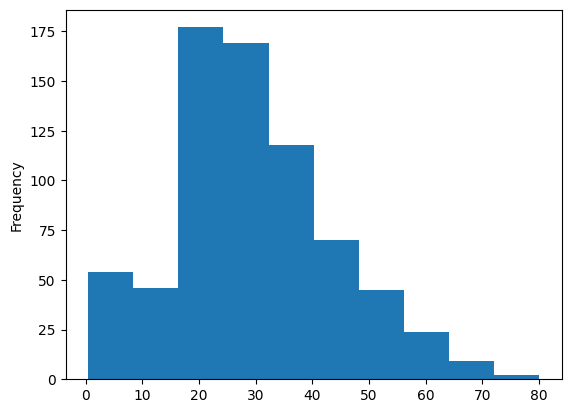

In [7]:
train_data['Age'].plot.hist()

The code `train_data['Age'].plot.hist()` generates a histogram of the 'Age' column in the DataFrame `train`. This histogram represents the distribution of ages among the passengers in the dataset.



### Frequency of passengers group by Fare





<Axes: ylabel='Frequency'>

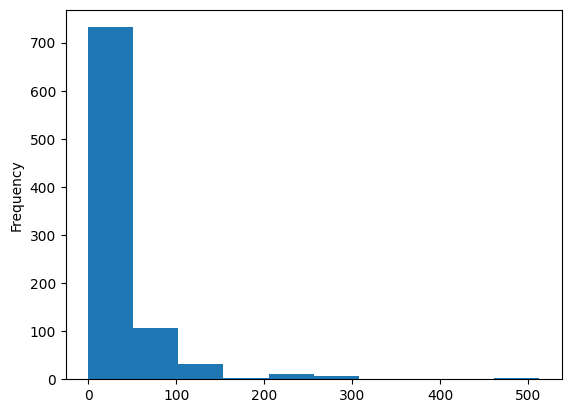

In [8]:
train_data['Fare'].plot.hist()

`train_data['Fare'].plot.hist()`generates a histogram of the 'Fare' column in the DataFrame `train`.
"Fares" refers to the prices or charges paid by passengers for transportation services, such as tickets for a journey on a ship, train, airplane, or other modes of transportation. In the context of the Titanic dataset or analysis, "fares" specifically refers to the amounts paid by passengers for their tickets for the voyage on the Titanic.


### Train Dataset Information





In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



### Number of siblings / spouses aboard the Titanic





<Axes: xlabel='SibSp', ylabel='count'>

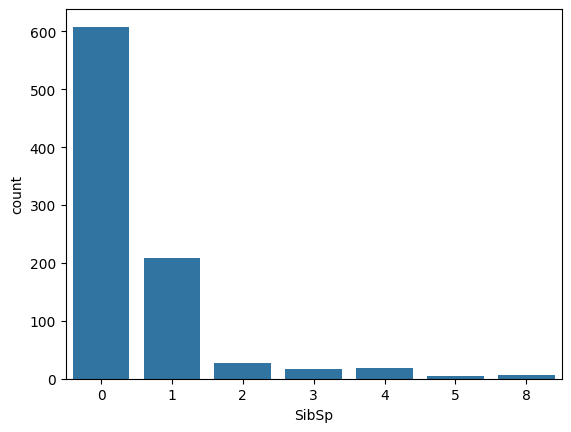

In [10]:
sns.countplot(x = 'SibSp', data = train_data)


### Check for NULL values in training set





In [11]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



### Heatmap for NULL values

The code `sns.heatmap(train.isnull())` generates a heatmap using the Seaborn library to visualize missing (null) values in the `train` DataFrame. Each cell in the heatmap represents a value in the DataFrame, with missing values indicated by a distinct color. This visualization helps to identify patterns and concentrations of missing data across different columns or features in the dataset.





<Axes: >

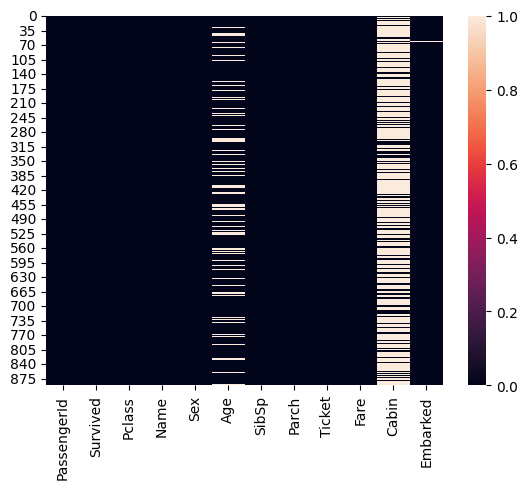

In [12]:
sns.heatmap(train_data.isnull())


### Passenger Class vs Age

The code `sns.boxplot(x='Pclass', y='Age', data=train)` creates a boxplot using the Seaborn library. In this plot:

- The x-axis represents the 'Pclass' (Passenger Class) feature, which categorizes passengers into different socio-economic classes (1st, 2nd, or 3rd).
- The y-axis represents the 'Age' feature, indicating the age of passengers.
- Each box in the plot represents the interquartile range (IQR) of ages for passengers belonging to a particular passenger class.
- The horizontal line inside each box represents the median age of passengers in that class.
- Any outliers, which are values that fall significantly beyond the whiskers of the box, are plotted individually as points.

This visualization helps to understand the distribution of ages among passengers in different passenger classes and to identify potential outliers or differences in age distribution across classes.






<Axes: xlabel='Pclass', ylabel='Age'>

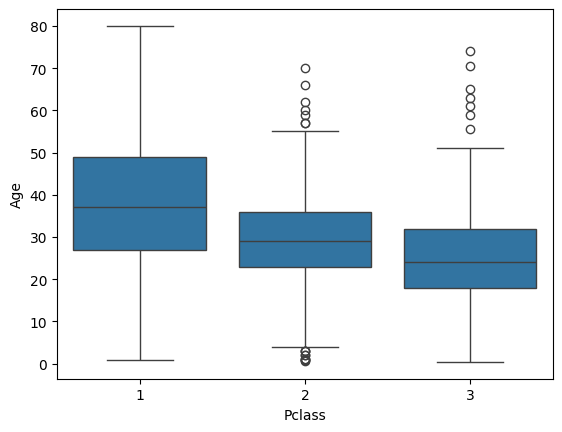

In [13]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data)


## Data Preprocessing


### Train Data

In [14]:
gender = pd.get_dummies(train_data['Sex'], drop_first = True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)
pcl = pd.get_dummies(train_data['Pclass'],drop_first=True)

The code uses the `pd.get_dummies()` function from the Pandas library to convert categorical variables into dummy/indicator variables. Here's what each line of code is doing:

1. `gender = pd.get_dummies(train['Sex'], drop_first=True)`: This line creates dummy variables for the 'Sex' column in the DataFrame `train`. It converts the 'Sex' column into two columns: one for male (1 or 0) and one for female (1 or 0). The `drop_first=True` parameter drops the first dummy column to avoid multicollinearity.

2. `embark = pd.get_dummies(train['Embarked'], drop_first=True)`: This line creates dummy variables for the 'Embarked' column in the DataFrame `train`. It converts the 'Embarked' column into dummy variables for the different ports of embarkation. The `drop_first=True` parameter drops the first dummy column to avoid multicollinearity.

3. `pcl = pd.get_dummies(train['Pclass'], drop_first=True)`: This line creates dummy variables for the 'Pclass' column in the DataFrame `train`. It converts the 'Pclass' column into dummy variables for the different passenger classes. The `drop_first=True` parameter drops the first dummy column to avoid multicollinearity.

After executing these lines of code, the `gender`, `embark`, and `pcl` DataFrames will contain the dummy variables for the 'Sex', 'Embarked', and 'Pclass' columns, respectively, which can be used for further analysis or modeling.


In [15]:
print("Gender Dummy Variables:")
print(gender.head())  # Display the first few rows of the 'sex' DataFrame

print("\nEmbarked Dummy Variables:")
print(embark.head())  # Display the first few rows of the 'embark' DataFrame

print("\nPclass Dummy Variables:")
print(pcl.head())  # Display the first few rows of the 'pcl' DataFrame


Gender Dummy Variables:
    male
0   True
1  False
2  False
3  False
4   True

Embarked Dummy Variables:
       Q      S
0  False   True
1  False  False
2  False   True
3  False   True
4  False   True

Pclass Dummy Variables:
       2      3
0  False   True
1  False  False
2  False   True
3  False  False
4  False   True



### Concat new features in train data





In [16]:
train_data = pd.concat([train_data,gender,embark,pcl],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True,False,True



The `pd.concat()` function is used to concatenate (join together) pandas objects along a particular axis. In this case, it concatenates the DataFrame `train` with the DataFrames `sex`, `embark`, and `pcl` along the column axis (`axis=1`), meaning the concatenation happens horizontally.



### Dropping columns from train dataset





In [17]:
train_data.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


The code drops several columns from the `train` DataFrame using the `drop()` method.

The dummy variables 'male', 'Q', 'S', '2', and '3' have been successfully created and concatenated to the DataFrame. These dummy variables represent the encoded information from the original categorical variables 'Sex', 'Embarked', and 'Pclass'. Here's a breakdown of what each of these dummy variables represents:

- 'male': This dummy variable indicates the gender of the passenger. It is 1 if the passenger is male and 0 if the passenger is female.

- 'Q' and 'S': These dummy variables represent the port of embarkation. 'Q' indicates Queenstown, and 'S' indicates Southampton. They are 1 if the passenger embarked from the corresponding port and 0 otherwise.

- '2' and '3': These dummy variables represent the passenger class. '2' indicates second class, and '3' indicates third class. They are 1 if the passenger belongs to the corresponding class and 0 otherwise.

The original columns 'Sex', 'Embarked', and 'Pclass' have been effectively encoded into these dummy variables, allowing for easier analysis and modeling in machine learning tasks.


### Check for NULL values





In [18]:
train_data.isnull().sum()

,0
Survived,0
Age,177
SibSp,0
Parch,0
Fare,0
male,0
Q,0
S,0
2,0
3,0



### Handling NULL values





In [19]:
train_values = {'Age': round(np.mean(train_data['Age']))}
train_data = train_data.fillna(value = train_values)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


The code fills missing values in the 'Age' column of the DataFrame `train` with the rounded mean age value. Here's how it works:

1. `train_values = {'Age': round(np.mean(train['Age']))}`: This calculates the mean age from the 'Age' column of the DataFrame `train` using `np.mean()`, rounds it using `round()`, and stores it in a dictionary with the key 'Age'. This dictionary will be used to fill missing values in the 'Age' column.

2. `train = train.fillna(value=train_values)`: This fills missing values in the DataFrame `train` using the values specified in the `train_values` dictionary. Specifically, it fills missing values in the 'Age' column with the rounded mean age value calculated earlier.

3. `train.head()`: This displays the first few rows of the modified DataFrame `train` after filling missing values in the 'Age' column.

Overall, this code ensures that missing values in the 'Age' column are replaced with the rounded mean age value, allowing for a more complete dataset.

In [21]:
# Save as CSV
train_data.to_csv('titanic-clean.csv', index=False)

In [20]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

These lines of code are preparing the data for machine learning tasks:

1. `X = train.drop('Survived', axis=1)`: This line creates a DataFrame `X` containing the features used for prediction. It removes the column `'Survived'` from the DataFrame `train` along the specified axis (axis=1, indicating columns). The resulting DataFrame `X` contains all columns from `train` except the `'Survived'` column.

2. `y = train['Survived']`: This line creates a Series `y` containing the target variable (labels) that the model will try to predict. It selects the column `'Survived'` from the DataFrame `train` and assigns it to `y`.

These steps are common in machine learning workflows, where you separate the features used for prediction (X) from the target variable (y). This allows you to train a model using the features to predict the target variable.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

This line of code splits the dataset into training and testing sets:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
```

Here's what each part does:

- `X_train`: This variable contains the features (input data) used for training the model.
- `X_test`: This variable contains the features used for testing the model's performance.
- `y_train`: This variable contains the corresponding labels (target variable) for the training set.
- `y_test`: This variable contains the corresponding labels for the testing set.

The `train_test_split` function from Scikit-Learn is used to split the dataset into training and testing sets. The parameters used are:

- `X`: The features DataFrame.
- `y`: The target variable Series.
- `test_size`: The proportion of the dataset to include in the testing set. Here, it's set to 0.3, meaning 30% of the data will be used for testing, and the remaining 70% for training.
- `random_state`: This parameter ensures reproducibility of the results. Setting it to a specific value (here, 1) ensures that the same random split is obtained every time the code is run.

## Define Model

In [23]:
logmodel = LogisticRegression(solver='liblinear')

The code initializes a logistic regression model with the solver parameter set to 'liblinear'. This solver is suitable for small datasets and is often used for binary classification problems. Here's a breakdown of the code:

```python
logmodel = LogisticRegression(solver='liblinear')
```

- `LogisticRegression`: This is a class from the scikit-learn library used to perform logistic regression, which is a type of regression analysis used for predicting the probability of a binary outcome.
  
- `solver='liblinear'`: This parameter specifies the algorithm to use in the optimization problem. In this case, 'liblinear' is chosen, which is suitable for small datasets and binary classification problems. It works well for datasets with a large number of features.

After initializing the logistic regression model, you can proceed to train it on your training data and then use it to make predictions on new data.

In [24]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)

# Fit the logistic regression model
logmodel.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

The code `logmodel.fit(X_train, y_train)` is used to train (fit) the logistic regression model on the training data. Here's what each part of the code does:

- `logmodel`: This is the logistic regression model that was previously initialized using `LogisticRegression()`.

- `fit(X_train, y_train)`: This method is called on the logistic regression model (`logmodel`) and is used to train the model on the provided training data (`X_train` and `y_train`). During training, the model learns the relationships between the features (`X_train`) and the target variable (`y_train`), so it can later make predictions.

After this line of code executes successfully, the logistic regression model (`logmodel`) will have learned from the training data, and you can then use it to make predictions on new data or evaluate its performance on test data.

In [25]:
X_test.columns = X_test.columns.astype(str)
predictions = logmodel.predict(X_test)


## Model Evaluation




### Classification Report



In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268




### Confusion Matrix





In [27]:
print(confusion_matrix(y_test, predictions))

[[135  18]
 [ 40  75]]


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.

Here's how to interpret the confusion matrix:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

You can interpret it as follows:
- The top-left value represents the number of true negatives (non-survivors correctly predicted as non-survivors).
- The top-right value represents the number of false positives (non-survivors incorrectly predicted as survivors).
- The bottom-left value represents the number of false negatives (survivors incorrectly predicted as non-survivors).
- The bottom-right value represents the number of true positives (survivors correctly predicted as survivors).


### Accuracy





In [28]:
print(accuracy_score(y_test, predictions))

0.7835820895522388


The accuracy score is a measure of the overall correctness of the model's predictions. It is calculated as the ratio of correctly predicted instances to the total number of instances.

Given the confusion matrix you provided earlier:

- True Negative (TN): 135
- False Positive (FP): 18
- False Negative (FN): 40
- True Positive (TP): 75

The total number of instances is \(TN + FP + FN + TP = 135 + 18 + 40 + 75 = 268\).

The accuracy score is calculated as:

$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{Total}
$$

Substituting the values:

$$
\text{Accuracy} = \frac{75 + 135}{268} = \frac{210}{268} \approx 0.78358209
$$

So, the accuracy score is approximately \(0.784\), or \(78.4\%\) when rounded to two decimal places. This means that the model correctly predicts the survival status of passengers in the test set with an accuracy of \(78.4\%\).


## Evaluating the Model Performance on Real Data






### Data Preprocessing (real data under test)

In [29]:
gender = pd.get_dummies(real_data['Sex'], drop_first = True)
embark = pd.get_dummies(real_data['Embarked'],drop_first=True)
pcl = pd.get_dummies(real_data['Pclass'],drop_first=True)


### Concat new features in test data





In [30]:
real_data = pd.concat([real_data,gender,embark,pcl],axis=1)
real_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,False,True



### Dropping columns from train dataset





In [31]:
real_data.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)


### Check for NULL values





In [32]:
real_data.isnull().sum()

,0
Age,86
SibSp,0
Parch,0
Fare,1
male,0
Q,0
S,0
2,0
3,0



### Handling NULL values





In [33]:
temp_values = {'Age':round(np.mean(real_data['Age'])), 'Fare':round(np.mean(real_data['Fare']))}
real_data = real_data.fillna(value = temp_values)
real_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,True,True,False,False,True
1,47.0,1,0,7.0000,False,False,True,False,True
2,62.0,0,0,9.6875,True,True,False,True,False
3,27.0,0,0,8.6625,True,False,True,False,True
4,22.0,1,1,12.2875,False,False,True,False,True



### Predictions





In [36]:
# Save as CSV
real_data.to_csv('titanic-real.csv', index=False)


In [34]:
real_data.columns = real_data.columns.astype(str)
test_predictions = logmodel.predict(real_data)

To predict the target variable for the test dataset using the trained logistic regression model `logmodel`, you can use the `predict()` method as follows:

```python
test_predictions = logmodel.predict(test_data)
```

Replace `test` with the features of your test dataset. After running this code, `test_predictions` will contain the predicted values for the target variable based on the features in the `test` dataset.

In [35]:
test_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Conclusion:

While there have been other attempts to solve this competition with higher accuracy, we opted for [this approach](https://github.com/risx3/ML-Logistic-Regression-Titanic/blob/main/titanic.ipynb) due to its simplicity and ease of interpretation.
for a better quality code check [this tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)